In [ ]:
# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)


In [ ]:
# Get Data

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
# Visualize Examples

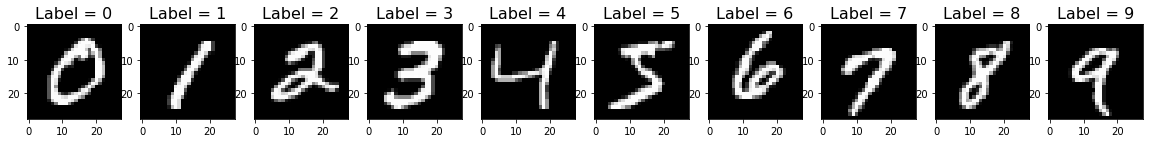

In [ ]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title(f"Label = {i}", fontsize=16)

In [ ]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [ ]:
# Discretize to categories of numbers through vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
# Data Preparation

In [ ]:
# Normalize Data w.r.t RGB Values
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Reshape Data (Flatten Image into Vector)
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape) # 28x28 -> 784

(60000, 784)


In [ ]:
# Create Model- Fully Connected Neural Network

In [ ]:
model = Sequential()

# Add Layers

# 128 Neurons in the Dense Layer, relu function after layer
model.add(Dense(units=128, input_shape=(784,), activation='relu')) 
model.add(Dense(units=128, activation='relu'))

# Remove 25% of Neurons in Training to prevent overfitting
model.add(Dropout(0.25))

# Output 10 Neurons for Classifier, Softmax to output probability for each class
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train

In [ ]:
batch_size = 512
epochs = 10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 2s 12ms/step - loss: 0.5885 - accuracy: 0.8280
Epoch 2/10
118/118 [==============================] - 2s 14ms/step - loss: 0.2241 - accuracy: 0.9355
Epoch 3/10
118/118 [==============================] - 2s 15ms/step - loss: 0.1618 - accuracy: 0.9527
Epoch 4/10
118/118 [==============================] - 2s 16ms/step - loss: 0.1276 - accuracy: 0.9626
Epoch 5/10
118/118 [==============================] - 2s 19ms/step - loss: 0.1034 - accuracy: 0.9697
Epoch 6/10
118/118 [==============================] - 2s 20ms/step - loss: 0.0867 - accuracy: 0.9746
Epoch 7/10
118/118 [==============================] - 2s 13ms/step - loss: 0.0751 - accuracy: 0.9770
Epoch 8/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0645 - accuracy: 0.9800
Epoch 9/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0564 - accuracy: 0.9829
Epoch 10/10
118/118 [==============================] - 2s 13ms/step - loss: 0.0511 - accura

In [ ]:
# Evauate

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test Acuracy {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0712 - accuracy: 0.9787
Test Loss: 0.07118482887744904, Test Acuracy 0.9786999821662903


In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 4ms/step
[[2.12911289e-07 2.01074363e-06 9.14241991e-06 ... 9.99969780e-01
  1.02188885e-07 2.08703750e-06]
 [1.75869047e-07 2.31899234e-04 9.99753714e-01 ... 2.55742294e-09
  9.34811487e-06 1.17903098e-09]
 [2.70382475e-06 9.99133945e-01 9.80064870e-05 ... 4.04438411e-04
  1.24906262e-04 7.39268080e-06]
 ...
 [1.07622622e-09 9.90988767e-08 4.28251656e-10 ... 1.09660084e-06
  2.71689061e-07 8.43497255e-05]
 [7.64254935e-08 6.74679086e-08 1.19229016e-09 ... 9.91185516e-08
  1.83412030e-05 7.93255406e-10]
 [2.62007092e-07 1.35176659e-09 2.56311182e-07 ... 2.59491900e-10
  6.02592110e-08 2.19548806e-11]]
[7 2 1 ... 4 5 6]


In [ ]:
# Check Single Example

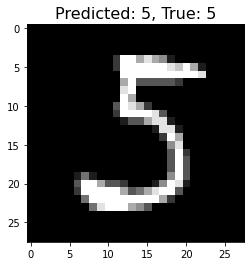

In [ ]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title(f"Predicted: {y_sample_pred_class}, True: {y_sample_true}", 
          fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

In [ ]:
# Confusion Matrix

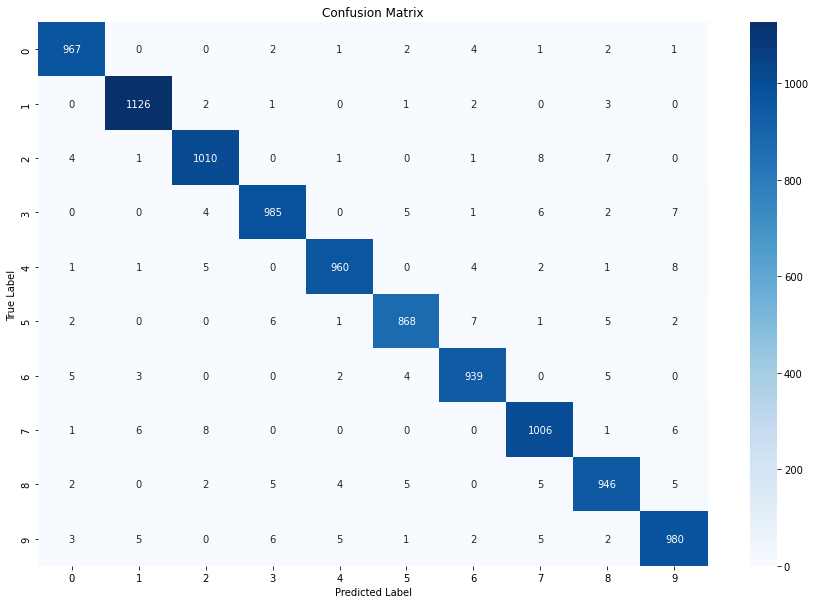

In [ ]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fix, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

In [ ]:
# Investigate Errors

In [ ]:
errors = (abs(y_pred_classes - y_true) < 0.000000001)
y_pred_classes_errors = y_pred_classes
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [ ]:
y_pred_errors_prob = np.max(y_pred_errors, axis=1)
true_prob_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_prob - true_prob_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # Last 5

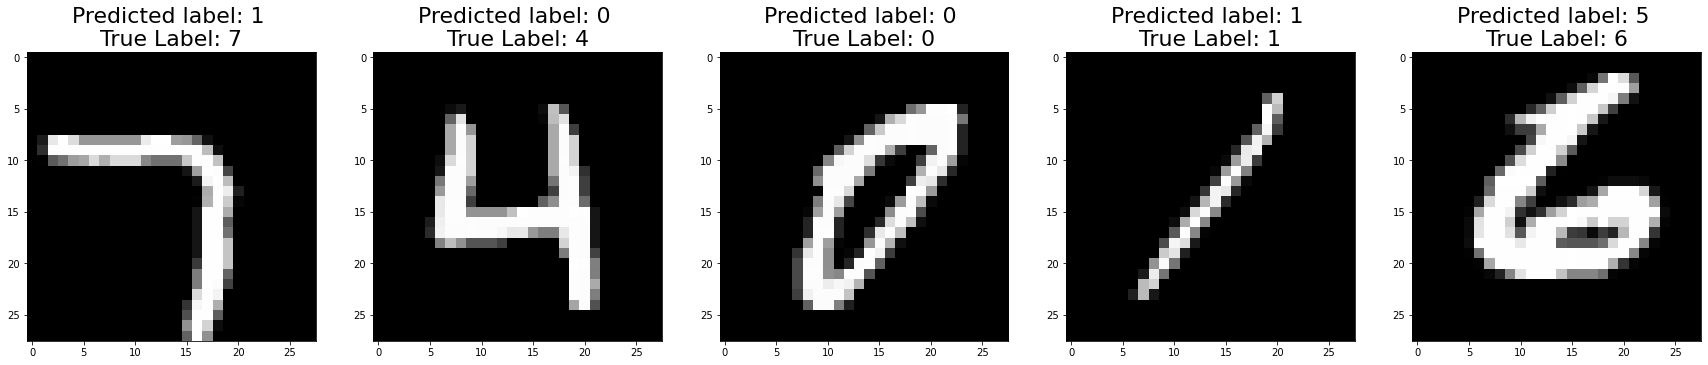

In [ ]:
# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title(f"Predicted label: {y_p} \nTrue Label: {y_t}", fontsize=22)